In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("data.csv")
df_right = df[df["Hand"] == "Right"].copy()
df_left = df[df["Hand"] == "Left"].copy()
df_both = df[df["Hand"] == "Both"].copy()

In [6]:
for name in df["Name"].unique():
    mask_right = df_right["Name"] == name
    df_right.loc[mask_right, "mean(x)"] = df_right.loc[mask_right, "x [cm]"].mean()
    df_right.loc[mask_right, "mean(y)"] = df_right.loc[mask_right, "y [cm]"].mean()

    mask_left = df_left["Name"] == name
    df_left.loc[mask_left, "mean(x)"] = df_left.loc[mask_left, "x [cm]"].mean()
    df_left.loc[mask_left, "mean(y)"] = df_left.loc[mask_left, "y [cm]"].mean()

    mask_both = df_both["Name"] == name
    df_both.loc[mask_both, "mean(x)"] = df_both.loc[mask_both, "x [cm]"].mean()
    df_both.loc[mask_both, "mean(y)"] = df_both.loc[mask_both, "y [cm]"].mean()

In [7]:
df_right["Distance"] = np.sqrt(
    (df_right["mean(x)"] - df_right["x [cm]"]) ** 2
    + (df_right["mean(y)"] - df_right["y [cm]"]) ** 2
)
df_left["Distance"] = np.sqrt(
    (df_left["mean(x)"] - df_left["x [cm]"]) ** 2
    + (df_left["mean(y)"] - df_left["y [cm]"]) ** 2
)
df_both["Distance"] = np.sqrt(
    (df_both["mean(x)"] - df_both["x [cm]"]) ** 2
    + (df_both["mean(y)"] - df_both["y [cm]"]) ** 2
)

In [ ]:
df_right_X = df_right[["Attempt"]]
df_right_y = df_right["Distance"]

df_left_X = df_left[["Attempt"]]
df_left_y = df_left["Distance"]

df_both_X = df_both[["Attempt"]]
df_both_y = df_both["Distance"]

In [54]:
df_right

,Name,Attempt,Hand,Mass [g],Underground,x [cm],y [cm],Leaves the grid,mean(x),mean(y),Distance
0,Johannes,1,Right,2.30,Wood,-2.7,2.5,NaN,-4.65,-0.11,3.258006
1,Johannes,2,Right,2.30,Wood,-4.0,4.6,NaN,-4.65,-0.11,4.754640
2,Johannes,3,Right,2.30,Wood,-6.0,-0.9,NaN,-4.65,-0.11,1.564161
3,Johannes,4,Right,2.30,Wood,-5.9,0.8,NaN,-4.65,-0.11,1.546157
4,Johannes,5,Right,2.30,Wood,-1.5,0.0,NaN,-4.65,-0.11,3.151920
5,Johannes,6,Right,2.30,Wood,-5.0,-1.3,NaN,-4.65,-0.11,1.240403
6,Johannes,7,Right,2.30,Wood,-7.0,-1.7,NaN,-4.65,-0.11,2.837358
7,Johannes,8,Right,2.30,Wood,-6.9,-3.3,NaN,-4.65,-0.11,3.903665
8,Johannes,9,Right,2.30,Wood,-4.1,-1.7,NaN,-4.65,-0.11,1.682439
9,Johannes,10,Right,2.30,Wood,-3.4,-0.1,NaN,-4.65,-0.11,1.250040


In [17]:
model_right = LinearRegression()
model_right.fit(df_right_X, df_right_y)
model_right.coef_, model_right.intercept_

(array([-0.07330653]), np.float64(3.6832367070079606))

In [20]:
model_both = LinearRegression()
model_both.fit(df_both_X, df_both_y)
model_both.coef_, model_both.intercept_

(array([-0.10851717]), np.float64(3.5962571391974265))

In [21]:
model_left = LinearRegression()
model_left.fit(df_left_X, df_left_y)
model_left.coef_, model_left.intercept_

(array([0.08073247]), np.float64(2.6546451312287327))

In [75]:
df_right_johannes = df_right[df_right["Name"] == "Johannes"]

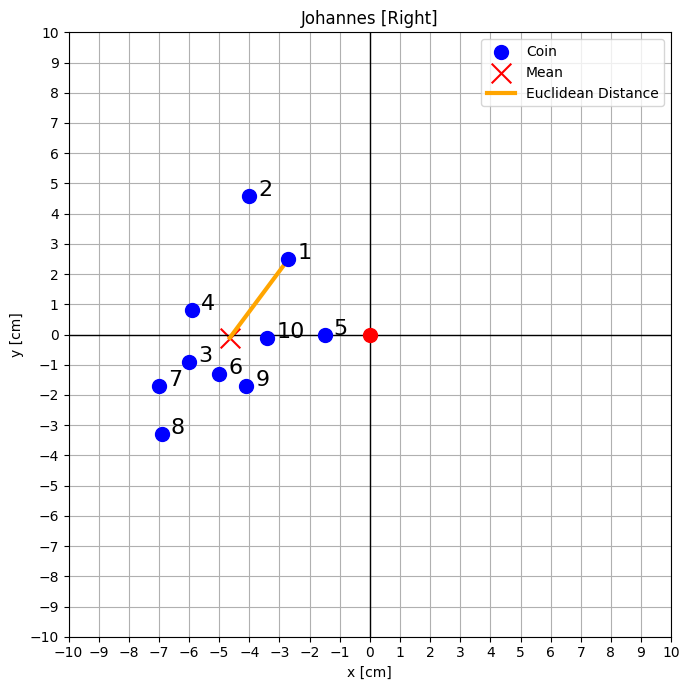

In [ ]:
plt.figure(figsize=(7, 7))

plt.scatter(
    df_right_johannes["x [cm]"],
    df_right_johannes["y [cm]"],
    color="blue",
    s=100,
    zorder=6,
    label="Coin",
)
plt.scatter(
    [df_right_johannes["mean(x)"].mean()],
    [df_right_johannes["mean(y)"].mean()],
    marker="x",
    color="red",
    s=200,
    label="Mean",
)
plt.scatter([0], [0], color="red", s=100, zorder=50)

for idx, row in df_right_johannes.iterrows():
    plt.text(
        row["x [cm]"] + 0.3,
        row["y [cm]"],
        str(row["Attempt"]),
        fontsize=16,
        ha="left",
        zorder=7,
    )

plt.plot(
    [df_right_johannes["mean(x)"].mean(), df_right_johannes.iloc[0]["x [cm]"]],
    [df_right_johannes["mean(y)"].mean(), df_right_johannes.iloc[0]["y [cm]"]],
    color="orange",
    linewidth=3,
    zorder=5,
    label="Euclidean Distance",
)

plt.title("Johannes [Right]")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xticks(np.arange(-10, 11, 1))
plt.yticks(np.arange(-10, 11, 1))
plt.axhline(0, color="black", linewidth=1)
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.axvline(0, color="black", linewidth=1)
plt.legend()
plt.tight_layout()
plt.grid(True)

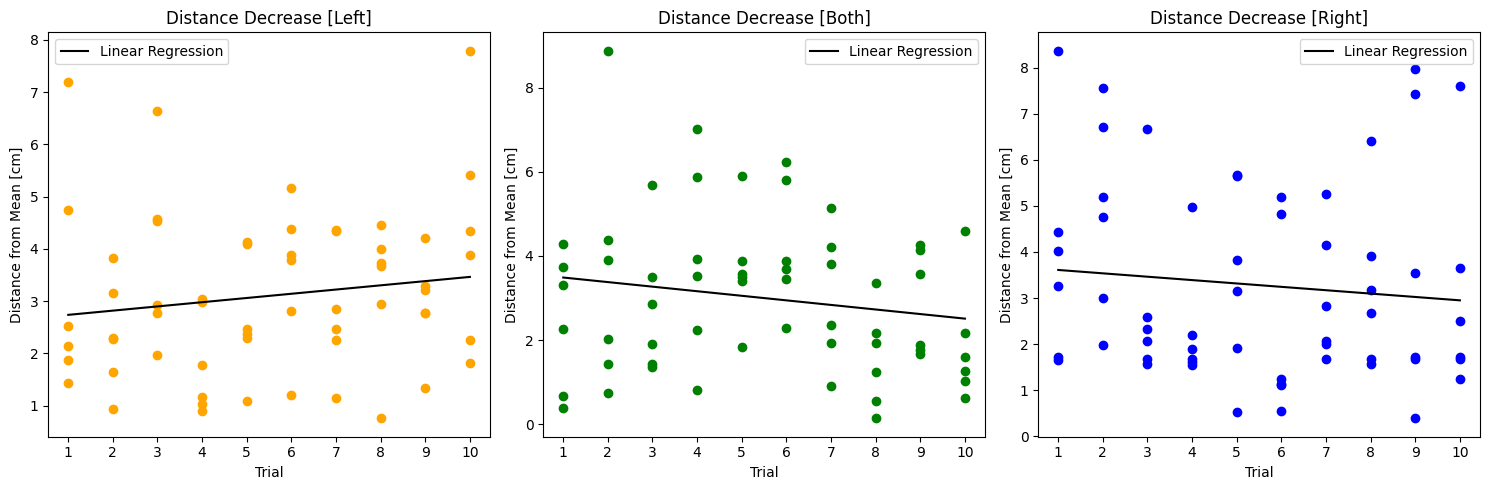

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax[0].scatter(df_left["Attempt"], df_left["Distance"], color="orange")
ax[0].plot(
    np.arange(1, 11),
    model_left.coef_[0] * np.arange(1, 11) + model_left.intercept_,
    color="black",
    label="Linear Regression",
)
ax[0].set_title("Distance Decrease [Left]")
ax[0].set_xlabel("Trial")
ax[0].set_ylabel("Distance from Mean [cm]")
ax[0].set_xticks(np.arange(1, 11))
ax[0].legend()

ax[1].scatter(df_both["Attempt"], df_both["Distance"], color="green")
ax[1].plot(
    np.arange(1, 11),
    model_both.coef_[0] * np.arange(1, 11) + model_both.intercept_,
    color="black",
    label="Linear Regression",
)
ax[1].set_title("Distance Decrease [Both]")
ax[1].set_xlabel("Trial")
ax[1].set_ylabel("Distance from Mean [cm]")
ax[1].set_xticks(np.arange(1, 11))
ax[1].legend()

ax[2].scatter(df_right["Attempt"], df_right["Distance"], color="blue")
ax[2].plot(
    np.arange(1, 11),
    model_right.coef_[0] * np.arange(1, 11) + model_right.intercept_,
    color="black",
    label="Linear Regression",
)
ax[2].set_title("Distance Decrease [Right]")
ax[2].set_xlabel("Trial")
ax[2].set_ylabel("Distance from Mean [cm]")
ax[2].set_xticks(np.arange(1, 11))
ax[2].legend()

plt.tight_layout()
plt.show()